In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2547/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
1,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,9,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Night
2,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,21,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
3,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,45,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Night
4,20243023,Qld,4,2024,Friday,01:00,Single,No,No,No,...,24,Outer Regional Australia,Cairns,Cairns,Local Road,No,No,17_to_25,Weekday,Night


In [3]:
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None
    
data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)
    

In [4]:
data['Speed Limit'].value_counts()

Speed Limit
 100.0    19222
 60.0     14275
 80.0      6606
 110.0     6430
 50.0      3255
 70.0      2743
-9.0       1434
 90.0      1181
 40.0       403
 75.0       254
 130.0      137
 20.0        34
 10.0        24
 30.0        16
 5.0          6
 25.0         3
 15.0         1
Name: count, dtype: int64

In [5]:
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 80' if x > 80 else 'Below 80')


In [6]:
data_2023 = data[data['Year'] == 2023]
road_user_counts = data_2023['Speed_Category'].value_counts()
print(road_user_counts)

Speed_Category
Below 80    712
Above 80    558
Name: count, dtype: int64


In [7]:
data['Speed Limit'].value_counts()

Speed Limit
 100.0    19222
 60.0     14275
 80.0      6606
 110.0     6430
 50.0      3255
 70.0      2743
-9.0       1434
 90.0      1181
 40.0       403
 75.0       254
 130.0      137
 20.0        34
 10.0        24
 30.0        16
 5.0          6
 25.0         3
 15.0         1
Name: count, dtype: int64

23:40:26 - cmdstanpy - INFO - Chain [1] start processing
23:40:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(


Predictions for Above 80 - Q1 2024:
            ds   yhat  yhat_lower  yhat_upper
420 2024-01-01  43.26       24.28       63.39
421 2024-02-01  37.52       19.01       55.93
422 2024-03-01  50.17       30.73       68.95


<Figure size 1000x600 with 0 Axes>

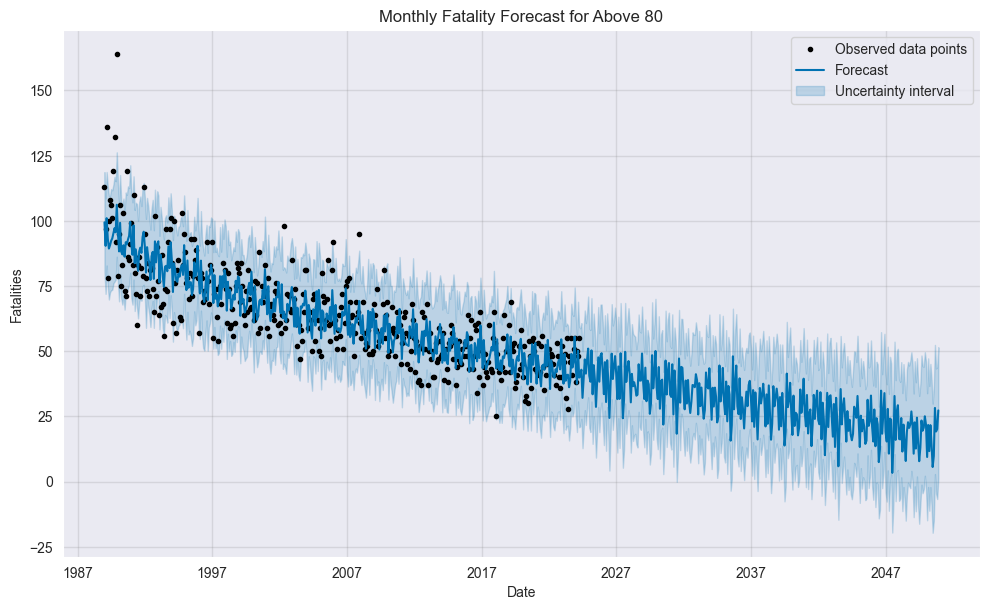

23:40:26 - cmdstanpy - INFO - Chain [1] start processing
23:40:26 - cmdstanpy - INFO - Chain [1] done processing



Predictions for Above 80 - 2030:
            ds   yhat  yhat_lower  yhat_upper
493 2030-01-31  31.65       12.42       50.34
494 2030-02-28  43.93       24.13       63.40
495 2030-03-31  27.95        8.82       47.80
496 2030-04-30  38.58       19.14       56.48
497 2030-05-31  39.09       20.70       58.09
498 2030-06-30  21.85        2.87       42.10
499 2030-07-31  30.79       12.28       47.91
500 2030-08-31  46.41       29.55       65.54
501 2030-09-30  33.40       13.28       53.80
502 2030-10-31  42.40       22.30       62.19
503 2030-11-30  45.46       25.20       64.78
504 2030-12-31  33.36       14.76       52.17

Predictions for Above 80 - 2040:
            ds   yhat  yhat_lower  yhat_upper
613 2040-01-31  17.90       -3.08       37.16
614 2040-02-29  32.96       12.82       52.15
615 2040-03-31  21.34        0.27       41.73
616 2040-04-30  26.38        5.75       47.54
617 2040-05-31  25.80        6.40       45.12
618 2040-06-30  17.72       -2.06       38.45
619 2040-07-

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',



Predictions for Below 80 - Q1 2024:
            ds   yhat  yhat_lower  yhat_upper
420 2024-01-01  44.35       23.28       64.37
421 2024-02-01  46.46       25.83       65.76
422 2024-03-01  55.72       35.03       75.20


<Figure size 1000x600 with 0 Axes>

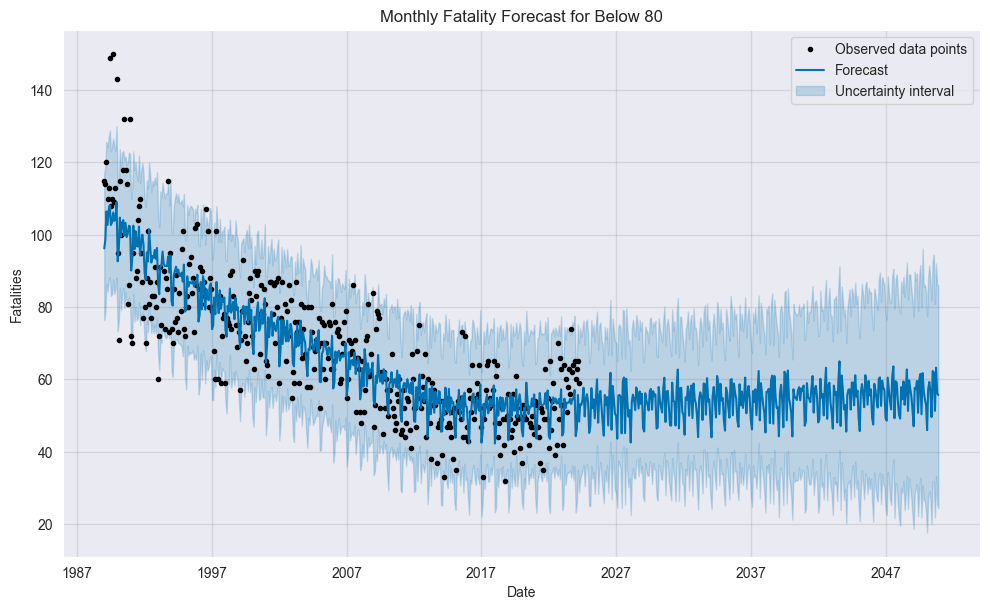


Predictions for Below 80 - 2030:
            ds   yhat  yhat_lower  yhat_upper
493 2030-01-31  46.68       26.53       66.22
494 2030-02-28  57.93       36.45       76.96
495 2030-03-31  54.34       35.90       73.97
496 2030-04-30  52.48       32.48       72.50
497 2030-05-31  50.88       32.30       70.26
498 2030-06-30  57.36       36.83       76.31
499 2030-07-31  60.48       39.75       80.14
500 2030-08-31  48.24       28.04       69.31
501 2030-09-30  56.65       37.74       75.04
502 2030-10-31  56.84       36.84       76.76
503 2030-11-30  52.63       32.07       74.29
504 2030-12-31  47.36       29.25       69.01

Predictions for Below 80 - 2040:
            ds   yhat  yhat_lower  yhat_upper
613 2040-01-31  44.26       21.28       65.55
614 2040-02-29  57.30       34.38       80.90
615 2040-03-31  55.00       31.71       78.78
616 2040-04-30  55.14       32.19       78.24
617 2040-05-31  54.33       32.11       77.64
618 2040-06-30  56.99       32.29       78.17
619 2040-07-

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet

data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)
data = data.dropna(subset=['Speed Limit'])

data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 80' if x > 80 else 'Below 80')

fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

forecasts = {}
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for speed_category in speed_categories:
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=True,
        weekly_seasonality=True,
    )
    model.fit(speed_data)

    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')
    forecast = model.predict(future)

    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'\nPredictions for {speed_category} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2))

    plt.figure(figsize=(10, 6))
    fig = model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    
    # تنظیم موقعیت لجند
    plt.legend(loc='upper right')  # یا می‌توانید مکان دیگری را انتخاب کنید
    plt.show()

    forecast_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    forecast_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    forecast_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]

    print(f'\nPredictions for {speed_category} - 2030:')
    print(forecast_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2))

    print(f'\nPredictions for {speed_category} - 2040:')
    print(forecast_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2))

    print(f'\nPredictions for {speed_category} - 2050:')
    print(forecast_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2))

actual_2023 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2023-01-01') & (fatalities_by_speed_month['Date'] <= '2023-12-31')]
actual_2023 = actual_2023.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)

for speed_category in speed_categories:
    actual_counts_2023 = actual_2023[[speed_category]].reset_index().rename(columns={'Date': 'ds', speed_category: 'y'})
    forecast_2023 = forecasts[speed_category][forecasts[speed_category]['ds'].isin(actual_counts_2023['ds'])]

    mae = round(mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mse = round(mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mape = round(mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)

    print(f'\nEvaluation metrics for {speed_category} (2023):')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'MAPE: {mape}')

actual_2024 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2024-01-01') & (fatalities_by_speed_month['Date'] <= '2024-03-31')]
actual_2024 = actual_2024.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)
print('\nActual fatalities for 2024:')
print(actual_2024.round(2))


In [5]:


data_2023 = data[data['Speed_Category']  == 2023]

road_user_counts = data_2023['Speed_Category'].value_counts()
print('Counts in 2023:')

print(road_user_counts)

Counts in 2023:
Series([], Name: Speed_Category, dtype: int64)


17:39:44 - cmdstanpy - INFO - Chain [1] start processing
17:39:45 - cmdstanpy - INFO - Chain [1] done processing



Predictions for Above 80 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  42.860791   23.257970   62.282396
421 2024-02-01  51.526662   32.105340   70.292227
422 2024-03-01  49.550566   31.178632   67.717453


<Figure size 1000x600 with 0 Axes>

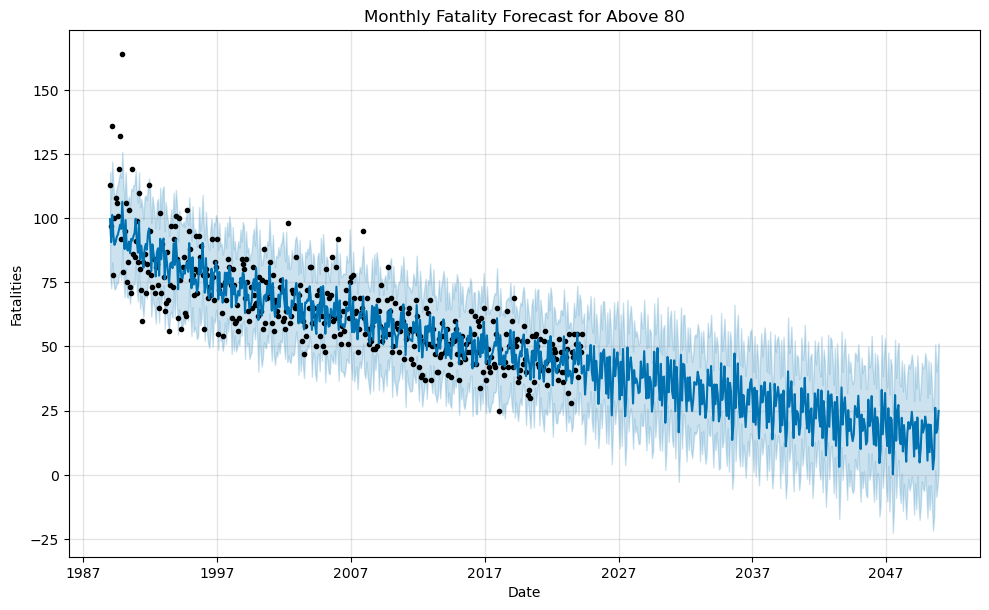


Predictions for Above 80 - 2030:
            ds   yhat  yhat_lower  yhat_upper
493 2030-01-31  29.12        9.52       47.98
494 2030-02-28  43.24       25.18       62.59
495 2030-03-31  26.98        9.38       46.84
496 2030-04-30  38.04       19.75       56.91
497 2030-05-31  38.28       19.73       58.29
498 2030-06-30  20.24        1.88       38.88
499 2030-07-31  29.37        9.46       49.99
500 2030-08-31  45.92       26.95       65.60
501 2030-09-30  32.15       12.71       50.24
502 2030-10-31  41.40       22.27       60.74
503 2030-11-30  44.71       25.50       64.02
504 2030-12-31  32.47       13.57       52.24

Predictions for Above 80 - 2040:
            ds   yhat  yhat_lower  yhat_upper
613 2040-01-31  14.30       -6.49       35.13
614 2040-02-29  31.46       11.83       52.34
615 2040-03-31  19.55        0.75       38.97
616 2040-04-30  24.82        5.21       46.62
617 2040-05-31  23.83        3.87       45.63
618 2040-06-30  15.57       -5.92       37.41
619 2040-07-

17:39:45 - cmdstanpy - INFO - Chain [1] start processing
17:39:45 - cmdstanpy - INFO - Chain [1] done processing



Predictions for Below 80 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  58.682337   39.458606   77.013228
421 2024-02-01  60.567749   40.286252   79.588277
422 2024-03-01  69.505696   51.129011   89.839533


<Figure size 1000x600 with 0 Axes>

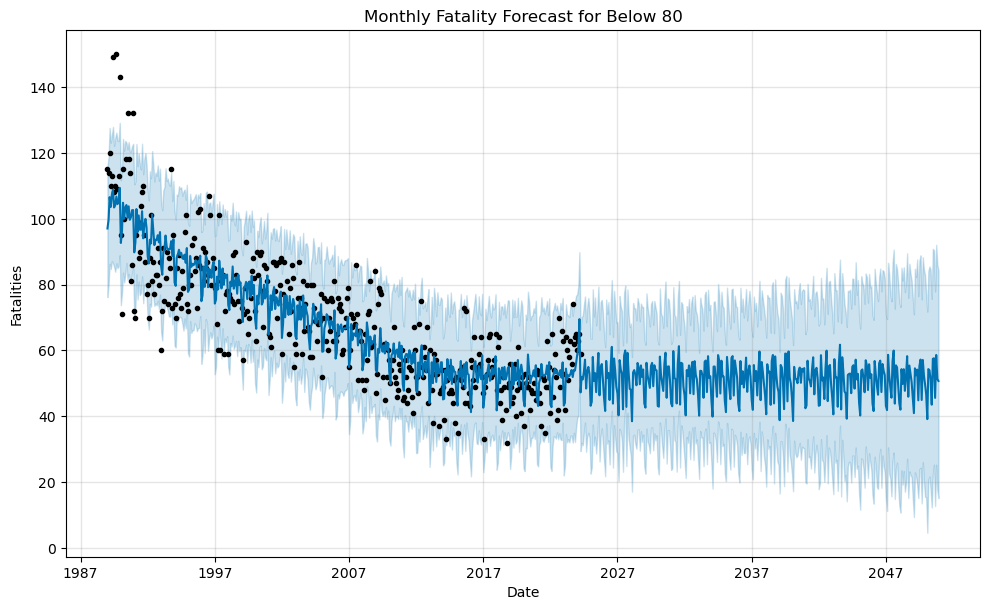


Predictions for Below 80 - 2030:
            ds   yhat  yhat_lower  yhat_upper
493 2030-01-31  42.94       22.38       61.80
494 2030-02-28  58.13       38.14       78.83
495 2030-03-31  52.38       35.20       71.15
496 2030-04-30  50.15       30.99       70.34
497 2030-05-31  47.71       27.37       66.88
498 2030-06-30  55.85       35.59       75.76
499 2030-07-31  59.32       39.35       80.93
500 2030-08-31  45.63       25.68       67.37
501 2030-09-30  55.12       35.83       75.83
502 2030-10-31  55.17       35.81       75.36
503 2030-11-30  50.76       31.01       71.10
504 2030-12-31  43.94       23.73       62.00

Predictions for Below 80 - 2040:
            ds   yhat  yhat_lower  yhat_upper
613 2040-01-31  38.58       17.26       61.65
614 2040-02-29  55.02       32.63       78.63
615 2040-03-31  51.58       28.85       74.48
616 2040-04-30  51.24       27.61       75.02
617 2040-05-31  50.06       28.15       72.78
618 2040-06-30  53.74       30.57       78.06
619 2040-07-

In [10]:
#Manual Holidays
#Manual Holidays
#Manual Holidays
#Manual Holidays
#Manual Holidays

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet

# Cleaning and preparing the data
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

holidays = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        '2024-02-01', '2024-02-02',
        # Add more holidays as needed
    ]),
    'lower_window': 0,
    'upper_window': 1,
})
holidayss = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        '2024-02-01', '2024-02-02','2024-01-01','2024-03-01'
        # Add more holidays as needed
    ]),
    'lower_window': 0,
    'upper_window': 1,
})
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)
data = data.dropna(subset=['Speed Limit'])

data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 80' if x > 80 else 'Below 80')

fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

forecasts = {}
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for speed_category in speed_categories:
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    if speed_category == 'Above 80':
        model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True, holidays=holidays)
    else:
        model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True,holidays=holidayss)

    model.fit(speed_data)

    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')
    forecast = model.predict(future)

    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'\nPredictions for {speed_category} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()

    forecast_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    forecast_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    forecast_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]

    print(f'\nPredictions for {speed_category} - 2030:')
    print(forecast_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2))

    print(f'\nPredictions for {speed_category} - 2040:')
    print(forecast_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2))

    print(f'\nPredictions for {speed_category} - 2050:')
    print(forecast_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2))

actual_2023 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2023-01-01') & (fatalities_by_speed_month['Date'] <= '2023-12-31')]
actual_2023 = actual_2023.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)

for speed_category in speed_categories:
    actual_counts_2023 = actual_2023[[speed_category]].reset_index().rename(columns={'Date': 'ds', speed_category: 'y'})
    forecast_2023 = forecasts[speed_category][forecasts[speed_category]['ds'].isin(actual_counts_2023['ds'])]

    mae = round(mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mse = round(mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mape = round(mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)

    print(f'\nEvaluation metrics for {speed_category} (2023):')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'MAPE: {mape}')
actual_2024 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2024-01-01') & (fatalities_by_speed_month['Date'] <= '2024-03-31')]
actual_2024 = actual_2024.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)
print('\nActual fatalities for 2024:')
print(actual_2024.round(2))


15:09:13 - cmdstanpy - INFO - Chain [1] start processing
15:09:13 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

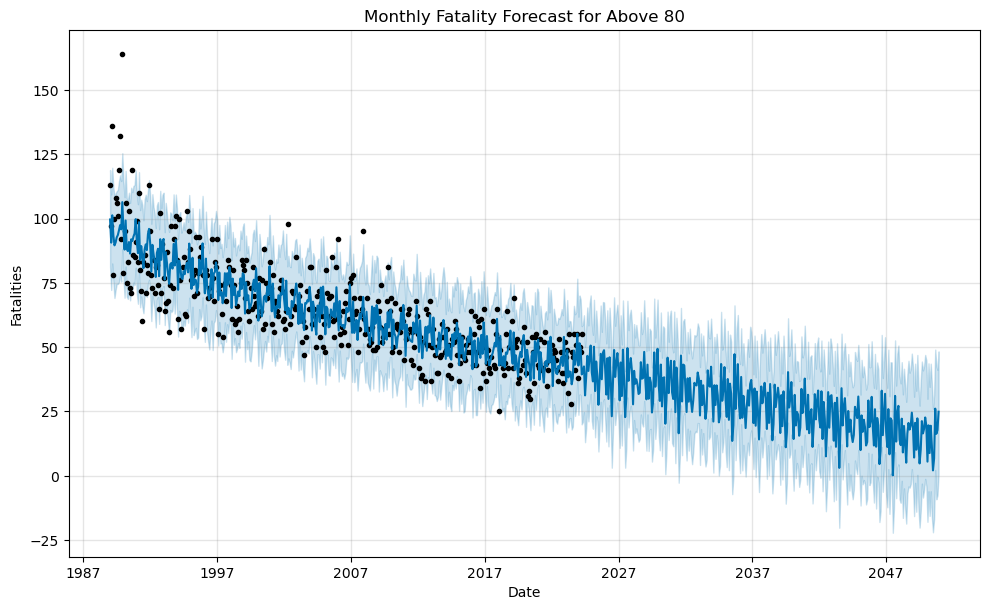

15:09:13 - cmdstanpy - INFO - Chain [1] start processing
15:09:13 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

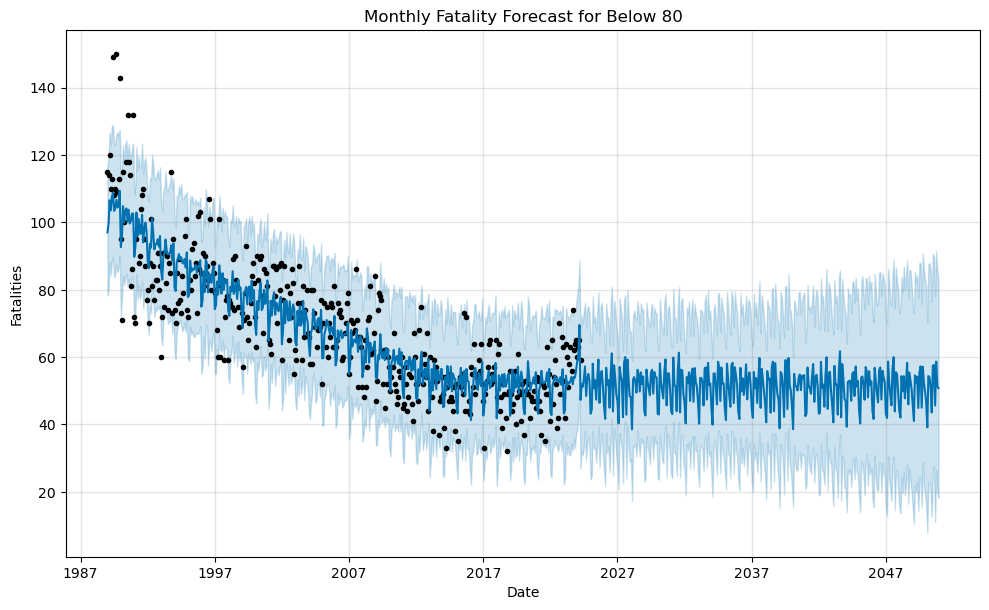


Evaluation metrics for Above 80 (2023):
MAE: 7.04
MSE: 69.53
MAPE: 0.16

Evaluation metrics for Below 80 (2023):
MAE: 8.18
MSE: 94.63
MAPE: 0.13

Actual fatalities for 2024:
Speed_Category  Above 80  Below 80
Date                              
2024-01-01            38        60
2024-02-01            50        63
2024-03-01            48        65

Sum of predictions for 2030, 2040, and 2050:
Speed_Category  Sum_2030  Sum_2040  Sum_2050
      Above 80    421.92    297.47    158.93
      Below 80    617.11    610.45    563.63


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet

# Assuming 'data' is already loaded with the necessary columns 'Year', 'Month', 'Speed Limit', etc.
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# Defining holidays
holidays = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        '2024-02-01', '2024-02-02',
        # Add more holidays as needed
    ]),
    'lower_window': 0,
    'upper_window': 1,
})
holidayss = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        '2024-02-01', '2024-02-02', '2024-01-01', '2024-03-01'
        # Add more holidays as needed
    ]),
    'lower_window': 0,
    'upper_window': 1,
})

# Cleaning speed limit data
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)
data = data.dropna(subset=['Speed Limit'])

# Creating Date and Speed Category columns
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 80' if x > 80 else 'Below 80')

# Grouping fatalities by month and speed category
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# Preparing for forecasting
forecasts = {}
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

# Forecasting for each speed category
for speed_category in speed_categories:
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    if speed_category == 'Above 80':
        model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True, holidays=holidays)
    else:
        model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True, holidays=holidayss)

    model.fit(speed_data)

    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')
    forecast = model.predict(future)

    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()

# Evaluation for 2023
actual_2023 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2023-01-01') & (fatalities_by_speed_month['Date'] <= '2023-12-31')]
actual_2023 = actual_2023.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)

for speed_category in speed_categories:
    actual_counts_2023 = actual_2023[[speed_category]].reset_index().rename(columns={'Date': 'ds', speed_category: 'y'})
    forecast_2023 = forecasts[speed_category][forecasts[speed_category]['ds'].isin(actual_counts_2023['ds'])]

    mae = round(mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mse = round(mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mape = round(mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)

    print(f'\nEvaluation metrics for {speed_category} (2023):')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'MAPE: {mape}')

# Actual fatalities for Q1 2024
actual_2024 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2024-01-01') & (fatalities_by_speed_month['Date'] <= '2024-03-31')]
actual_2024 = actual_2024.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)
print('\nActual fatalities for 2024:')
print(actual_2024.round(2))

# Printing sum of predictions for 2030, 2040, and 2050
print('\nSum of predictions for 2030, 2040, and 2050:')
sum_predictions = []

for speed_category in speed_categories:
    forecast = forecasts[speed_category]
    sum_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]['yhat'].sum()
    sum_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]['yhat'].sum()
    sum_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]['yhat'].sum()

    sum_predictions.append({
        'Speed_Category': speed_category,
        'Sum_2030': round(sum_2030, 2),
        'Sum_2040': round(sum_2040, 2),
        'Sum_2050': round(sum_2050, 2)
    })

sum_df = pd.DataFrame(sum_predictions)
print(sum_df.to_string(index=False))


In [8]:
data['Speed_Category'].value_counts()

Below 80    29054
Above 80    26970
Name: Speed_Category, dtype: int64

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    """Perform ADF test and print results."""
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# Performing ADF test on each speed category
for speed_category in speed_categories:
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    adf_test(speed_data['Fatalities'], title=f'Fatalities for {speed_category}')


Augmented Dickey-Fuller Test: Fatalities for Above 80
ADF Test Statistic              -3.003384
p-value                          0.034580
# Lags Used                     17.000000
Number of Observations Used    406.000000
Critical Value (1%)             -3.446560
Critical Value (5%)             -2.868685
Critical Value (10%)            -2.570576

Augmented Dickey-Fuller Test: Fatalities for Below 80
ADF Test Statistic              -3.964856
p-value                          0.001606
# Lags Used                     11.000000
Number of Observations Used    412.000000
Critical Value (1%)             -3.446322
Critical Value (5%)             -2.868581
Critical Value (10%)            -2.570521



17:45:26 - cmdstanpy - INFO - Chain [1] start processing
17:45:26 - cmdstanpy - INFO - Chain [1] done processing


Dickey-Fuller Test Results:
Augmented Dickey-Fuller Test: Fatalities for Above 80
ADF Test Statistic              -3.003384
p-value                          0.034580
# Lags Used                     17.000000
Number of Observations Used    406.000000
Critical Value (1%)             -3.446560
Critical Value (5%)             -2.868685
Critical Value (10%)            -2.570576

Augmented Dickey-Fuller Test: Fatalities for Below 80
ADF Test Statistic              -3.964856
p-value                          0.001606
# Lags Used                     11.000000
Number of Observations Used    412.000000
Critical Value (1%)             -3.446322
Critical Value (5%)             -2.868581
Critical Value (10%)            -2.570521



<Figure size 1000x600 with 0 Axes>

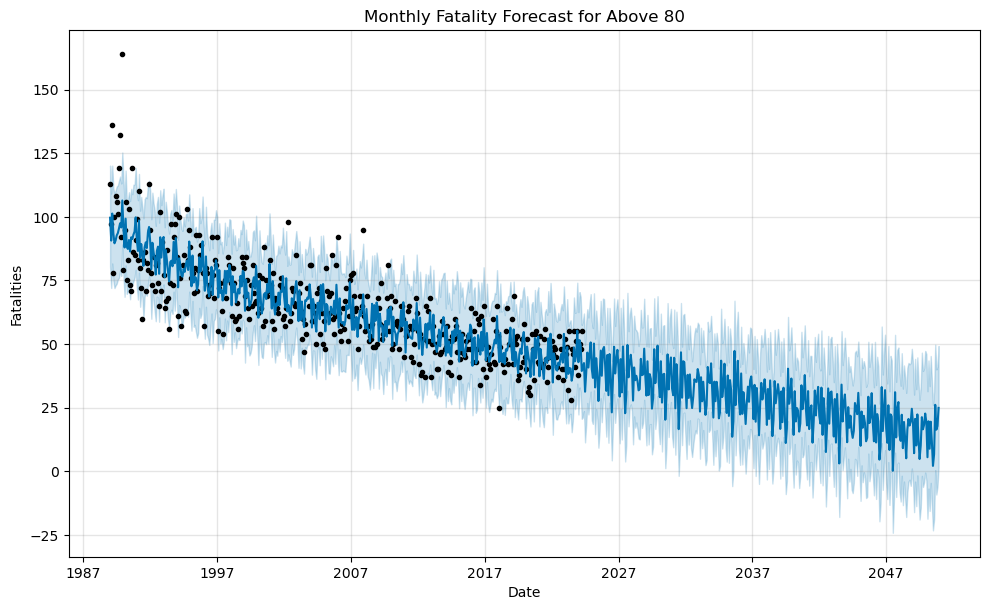

17:45:26 - cmdstanpy - INFO - Chain [1] start processing
17:45:27 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

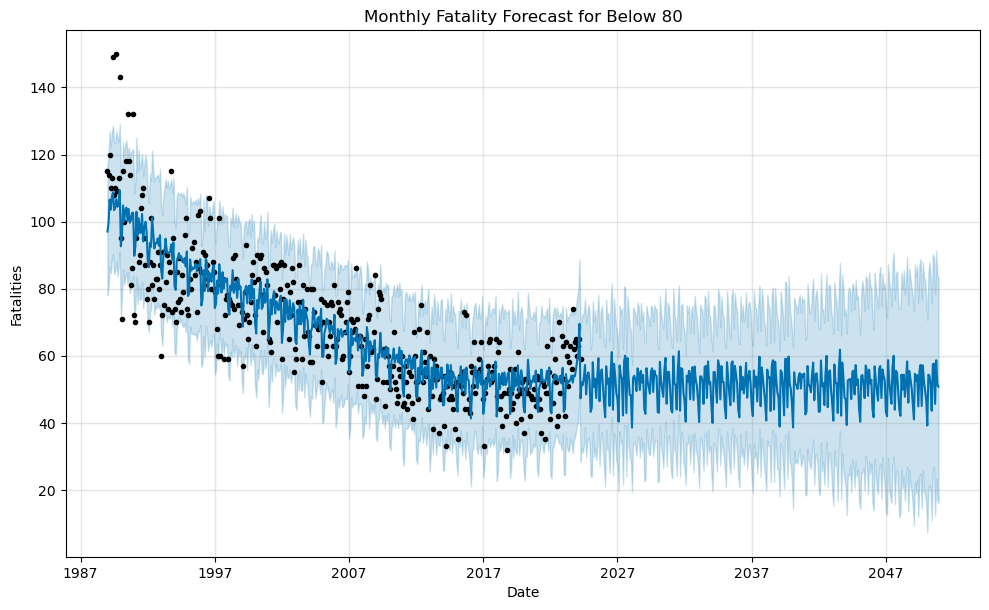


Evaluation metrics for Above 80 (2023):
MAE: 7.04
MSE: 69.53
MAPE: 0.16

Evaluation metrics for Below 80 (2023):
MAE: 8.18
MSE: 94.63
MAPE: 0.13

Actual fatalities for 2024:
Speed_Category  Above 80  Below 80
Date                              
2024-01-01            38        60
2024-02-01            50        63
2024-03-01            48        65

Sum of predictions for 2030, 2040, and 2050:
Speed_Category  Sum_2030  Sum_2040  Sum_2050
      Above 80    421.92    297.47    158.93
      Below 80    617.11    610.45    563.63


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is already loaded with the necessary columns 'Year', 'Month', 'Speed Limit', etc.
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# Defining holidays
holidays = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        '2024-02-01', '2024-02-02',
        # Add more holidays as needed
    ]),
    'lower_window': 0,
    'upper_window': 1,
})
holidayss = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        '2024-02-01', '2024-02-02', '2024-01-01', '2024-03-01'
        # Add more holidays as needed
    ]),
    'lower_window': 0,
    'upper_window': 1,
})

# Cleaning speed limit data
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)
data = data.dropna(subset=['Speed Limit'])

# Creating Date and Speed Category columns
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 80' if x > 80 else 'Below 80')

# Grouping fatalities by month and speed category
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# Preparing for forecasting
forecasts = {}
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

# Performing ADF test
def adf_test(series, title=''):
    """Perform ADF test and print results."""
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# Performing ADF test on each speed category
print("Dickey-Fuller Test Results:")
for speed_category in speed_categories:
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    adf_test(speed_data['Fatalities'], title=f'Fatalities for {speed_category}')

# Forecasting for each speed category
for speed_category in speed_categories:
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    if speed_category == 'Above 80':
        model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True, holidays=holidays)
    else:
        model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True, holidays=holidayss)

    model.fit(speed_data)

    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')
    forecast = model.predict(future)

    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()

# Evaluation for 2023
actual_2023 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2023-01-01') & (fatalities_by_speed_month['Date'] <= '2023-12-31')]
actual_2023 = actual_2023.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)

for speed_category in speed_categories:
    actual_counts_2023 = actual_2023[[speed_category]].reset_index().rename(columns={'Date': 'ds', speed_category: 'y'})
    forecast_2023 = forecasts[speed_category][forecasts[speed_category]['ds'].isin(actual_counts_2023['ds'])]

    mae = round(mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mse = round(mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)
    mape = round(mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat']), 2)

    print(f'\nEvaluation metrics for {speed_category} (2023):')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'MAPE: {mape}')

# Actual fatalities for Q1 2024
actual_2024 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2024-01-01') & (fatalities_by_speed_month['Date'] <= '2024-03-31')]
actual_2024 = actual_2024.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)
print('\nActual fatalities for 2024:')
print(actual_2024.round(2))

# Printing sum of predictions for 2030, 2040, and 2050
print('\nSum of predictions for 2030, 2040, and 2050:')
sum_predictions = []

for speed_category in speed_categories:
    forecast = forecasts[speed_category]
    sum_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]['yhat'].sum()
    sum_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]['yhat'].sum()
    sum_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]['yhat'].sum()

    sum_predictions.append({
        'Speed_Category': speed_category,
        'Sum_2030': round(sum_2030, 2),
        'Sum_2040': round(sum_2040, 2),
        'Sum_2050': round(sum_2050, 2)
    })

sum_df = pd.DataFrame(sum_predictions)
print(sum_df.to_string(index=False))
